# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./datasets/train.csv', delimiter=',')

data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [3]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [4]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


### Описание данных
**ClientPeriod:** Длительность времени (в месяцах), на протяжении которого клиент пользуется услугами.
**MonthlySpending:** Ежемесячные расходы клиента на услуги.
**TotalSpent:** Общая сумма, потраченная клиентом на услуги за весь период.
**Sex:** Пол клиента.
**IsSeniorCitizen:** Является ли клиент пожилым.
**HasPartner:** Есть ли у клиента партнер.
**HasChild:** Есть ли у клиента дети.
**HasPhoneService:** Подключена ли у клиента телефонная связь.
**HasMultiplePhoneNumbers:** Есть ли у клиента несколько телефонных номеров.
**HasInternetService:** Подключена ли у клиента интернет-связь.
**HasOnlineSecurityService:** Подключена ли у клиента услуга онлайн-безопасности.
**HasOnlineBackup:** Подключена ли у клиента услуга онлайн-резервного копирования.
**HasDeviceProtection:** Подключена ли у клиента услуга защиты устройства.
**HasTechSupportAccess:** Имеет ли клиент доступ к технической поддержке.
**HasOnlineTV:** Подключена ли у клиента услуга онлайн-ТВ.
**HasMovieSubscription:** Подключена ли у клиента подписка на фильмы.
**HasContractPhone:** Тип контракта на телефонную связь.
**IsBillingPaperless:** Использует ли клиент безбумажный способ выставления счетов.
**PaymentMethod:** Способ оплаты.
**Churn:** Является ли клиент "ушедшим".

In [5]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
for col in cat_cols:
    print(col, data[col].unique())

Sex ['Male' 'Female']
IsSeniorCitizen [0 1]
HasPartner ['Yes' 'No']
HasChild ['Yes' 'No']
HasPhoneService ['Yes' 'No']
HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']
HasInternetService ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService ['No internet service' 'No' 'Yes']
HasOnlineBackup ['No internet service' 'No' 'Yes']
HasDeviceProtection ['No internet service' 'No' 'Yes']
HasTechSupportAccess ['No internet service' 'Yes' 'No']
HasOnlineTV ['No internet service' 'No' 'Yes']
HasMovieSubscription ['No internet service' 'No' 'Yes']
HasContractPhone ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless ['No' 'Yes']
PaymentMethod ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


**Заполним пропуски средним значением из выборки, чтобы не потерять часть данных.**

In [7]:
mean_total_spent = data['TotalSpent'][data['TotalSpent'] != ' '].astype(float).mean()
float(mean_total_spent)

2291.3904608382327

In [8]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data['TotalSpent'] = data['TotalSpent'].fillna(0.0)
data['TotalSpent'].isna().sum()

0

In [9]:
numerical_signs = data[num_cols]
category_signs = data[cat_cols]
target = data[target_col]

x_origin = data[feature_cols] # For catboost

## Анализ данных

''

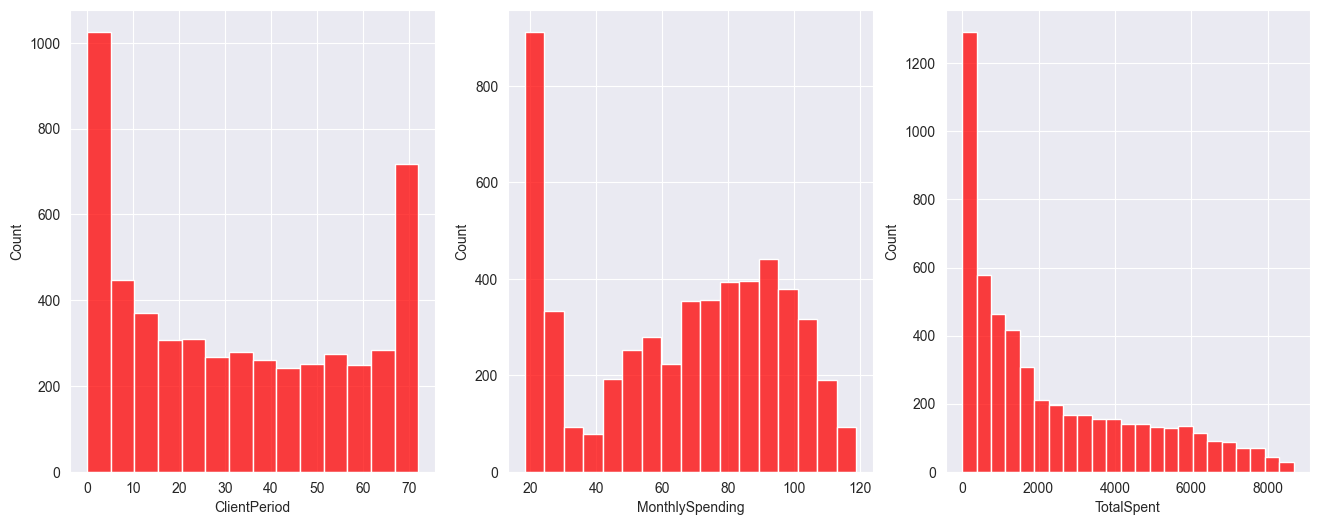

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

for i in range(3):
    category = numerical_signs.columns[i]
    sns.histplot(numerical_signs[category], color='red', ax=ax[i])
;

''

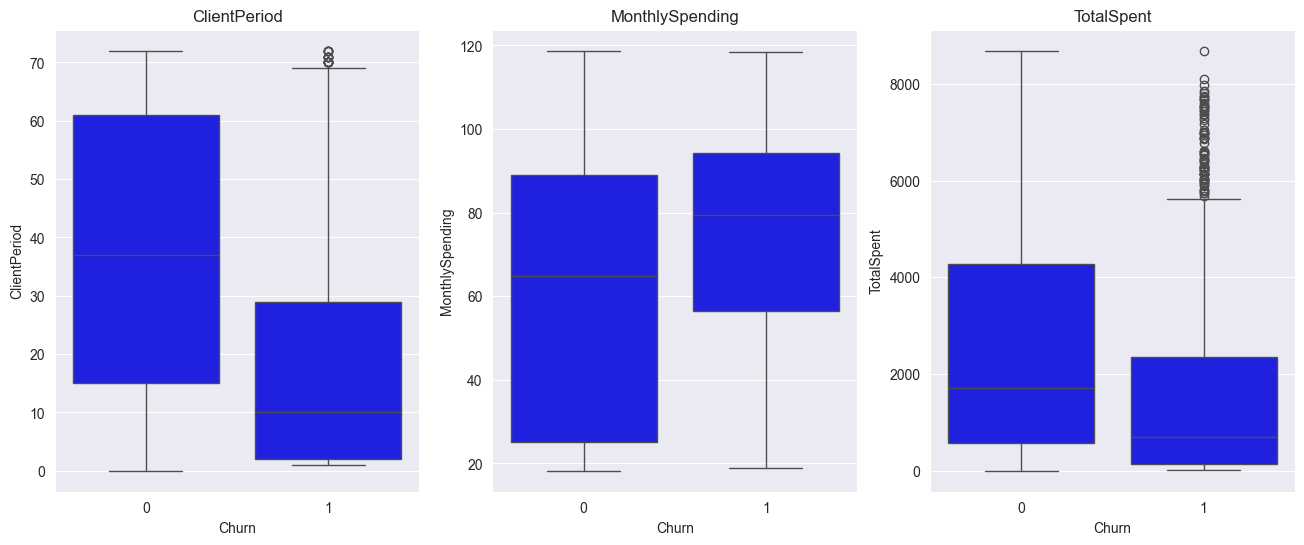

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

for i in range(len(numerical_signs.columns)):
    sns.boxplot(x=target, y=numerical_signs.iloc[:, i], ax=ax[i], color='blue')
    ax[i].set_title(numerical_signs.columns[i])
;

''

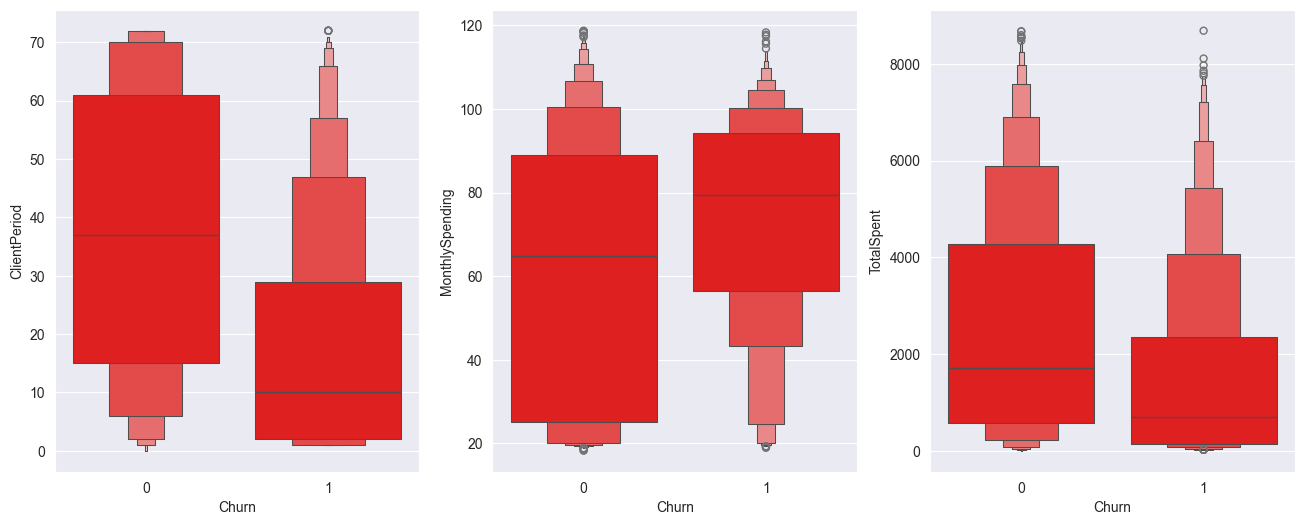

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

for i in [0, 1, 2]:
    sns.boxenplot(x=target, y=numerical_signs.iloc[:, i], color='red', ax=ax[i])
;

<Axes: xlabel='TotalSpent', ylabel='Churn'>

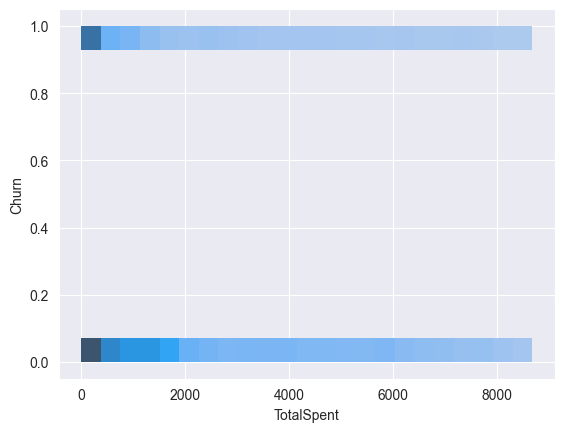

In [13]:
sns.histplot(x=data['TotalSpent'], y=target)

''

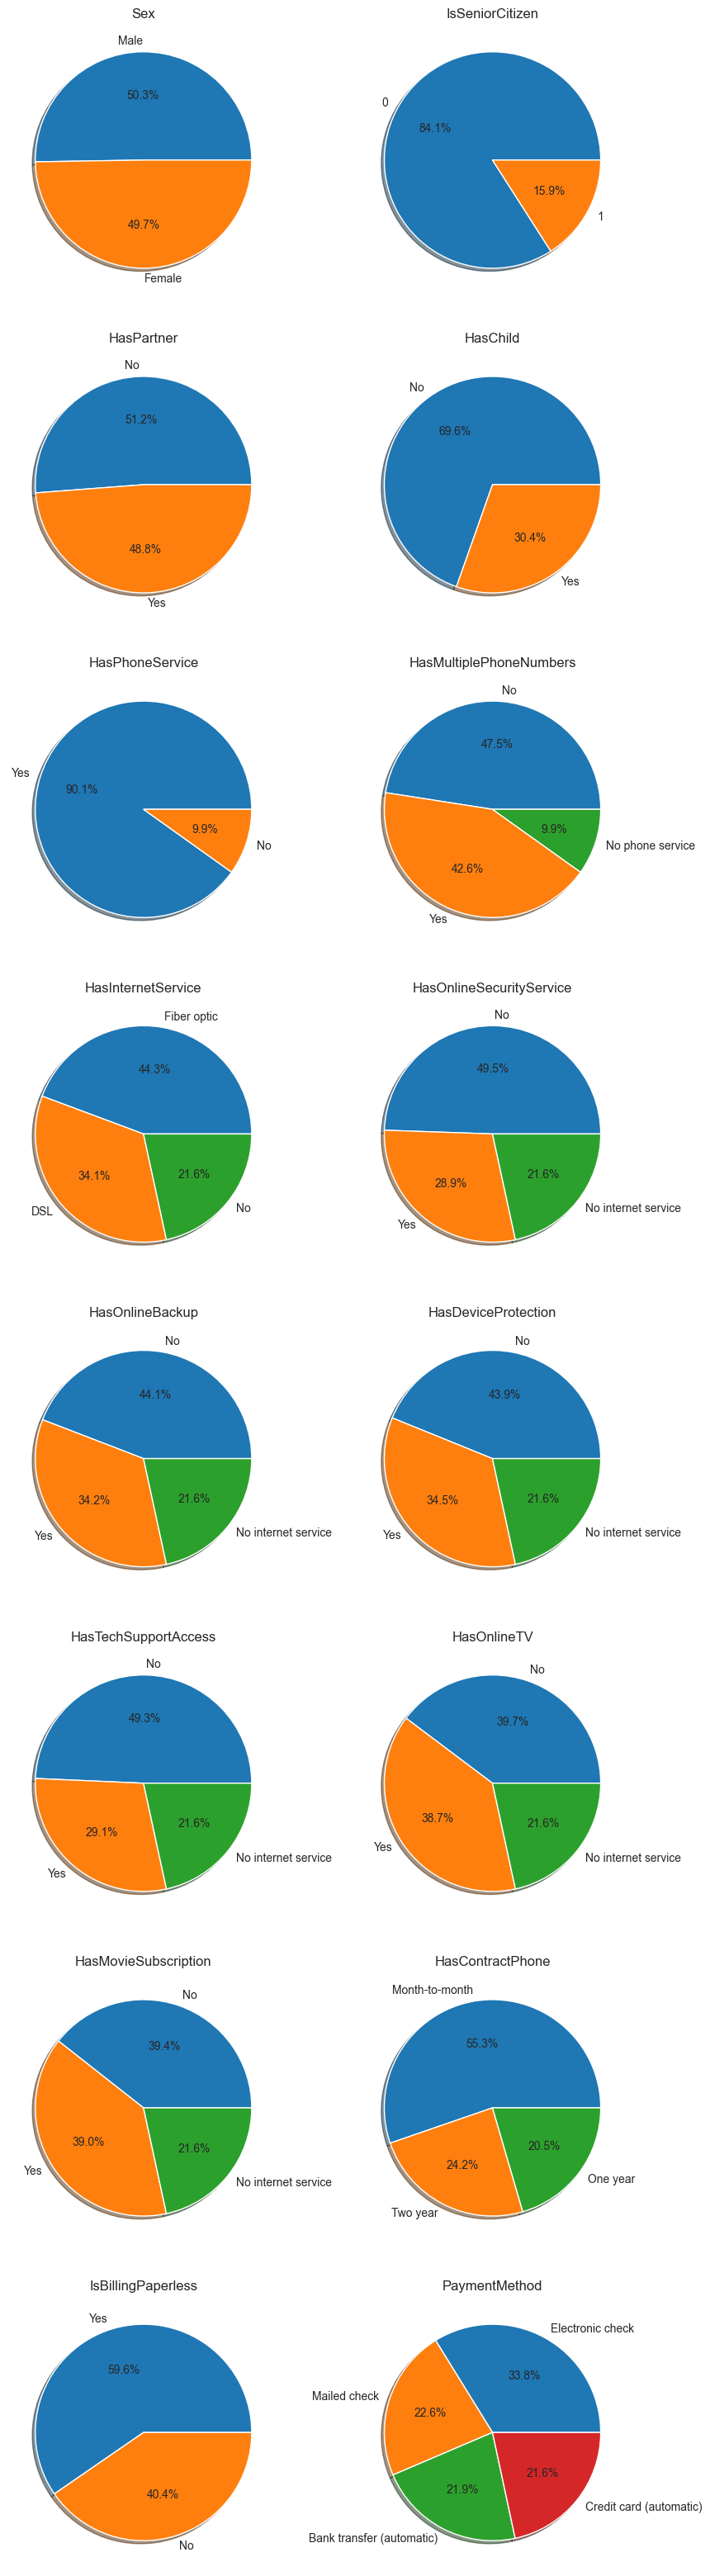

In [14]:
_, ax = plt.subplots(ncols=2, nrows=8, figsize=(10, 40))

count = 0
for i in range(8):
    for j in range(2):
        cat_counts = category_signs[category_signs.columns[count]].value_counts()
        ax[i, j].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', shadow=True)
        ax[i, j].set_title(category_signs.columns[count])
        count += 1
;

In [15]:
data.nunique()

ClientPeriod                  73
MonthlySpending             1468
TotalSpent                  4978
Sex                            2
IsSeniorCitizen                2
HasPartner                     2
HasChild                       2
HasPhoneService                2
HasMultiplePhoneNumbers        3
HasInternetService             3
HasOnlineSecurityService       3
HasOnlineBackup                3
HasDeviceProtection            3
HasTechSupportAccess           3
HasOnlineTV                    3
HasMovieSubscription           3
HasContractPhone               3
IsBillingPaperless             2
PaymentMethod                  4
Churn                          2
dtype: int64

''

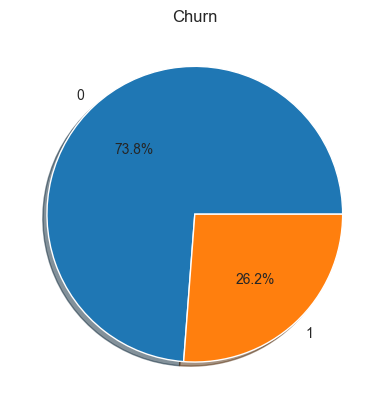

In [16]:
cat_counts = data['Churn'].value_counts()
plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('Churn')
;

### Таргет не является сбалансированным :(

In [17]:
#df = pd.get_dummies(data[feature_cols], columns=cat_cols, drop_first=True).astype(float)
#df.head()

## Применение линейных моделей

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], target, test_size=0.3, random_state=42)

In [20]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [21]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

In [22]:
transformed_X_train = preprocessor.fit_transform(X_train)
transformed_X_train[:4]

array([[ 0.91630938,  1.62387377,  1.76084447,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.55111807,  0.54062915,  0.68608539,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.     

In [23]:
transformed_X_test = preprocessor.transform(X_test)

In [24]:
log_reg_model = LogisticRegression()

In [25]:
log_reg_model.fit(transformed_X_train, y_train)

LogisticRegression()

In [26]:
y_pred = log_reg_model.predict(transformed_X_test)

In [27]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [28]:
accuracy_score(y_test, y_pred)

0.7899053627760252

In [29]:
roc_auc_score(y_test, pd.DataFrame(log_reg_model.predict_proba(transformed_X_test)).iloc[:, 1])

0.8323253327247291

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
params = {
    'C': np.arange(0.05, 5, 0.15),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [32]:
grid_search = GridSearchCV(LogisticRegression(random_state=42), cv=7, param_grid=params, refit=True, scoring='roc_auc')

In [33]:
grid_search.fit(transformed_X_train, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([0.05, 0.2 , 0.35, 0.5 , 0.65, 0.8 , 0.95, 1.1 , 1.25, 1.4 , 1.55,
       1.7 , 1.85, 2.  , 2.15, 2.3 , 2.45, 2.6 , 2.75, 2.9 , 3.05, 3.2 ,
       3.35, 3.5 , 3.65, 3.8 , 3.95, 4.1 , 4.25, 4.4 , 4.55, 4.7 , 4.85]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [34]:
grid_search.best_score_

0.8497735556160205

In [35]:
best_model = grid_search.best_estimator_

In [36]:
y_proba = best_model.predict_proba(transformed_X_test)

In [37]:
roc_auc_score(y_test, y_proba[:, 1])

0.8317463135072082

In [38]:
y_pred = best_model.predict_proba(transformed_X_train)

In [39]:
roc_auc_score(y_train, y_pred[:, 1])

0.8550948594702246

In [40]:
y_pred = best_model.predict(transformed_X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.7924290220820189

## Применение градиентного бустинга

In [42]:
from catboost import CatBoostClassifier

In [43]:
cat_boost = CatBoostClassifier(
    cat_features=cat_cols,
)

In [44]:
data_train = pd.read_csv('./datasets/train.csv', delimiter=',')
y_ = data_train['Churn']
X_ = data_train.drop(columns=['Churn'])

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [46]:
cat_boost.fit(X_train, y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.019062
0:	learn: 0.6798227	total: 189ms	remaining: 3m 8s
1:	learn: 0.6678084	total: 215ms	remaining: 1m 47s
2:	learn: 0.6553003	total: 247ms	remaining: 1m 22s
3:	learn: 0.6435910	total: 278ms	remaining: 1m 9s
4:	learn: 0.6326850	total: 311ms	remaining: 1m 1s
5:	learn: 0.6225823	total: 346ms	remaining: 57.3s
6:	learn: 0.6128742	total: 373ms	remaining: 52.9s
7:	learn: 0.6048572	total: 387ms	remaining: 48s
8:	learn: 0.5958847	total: 415ms	remaining: 45.7s
9:	learn: 0.5871696	total: 442ms	remaining: 43.8s
10:	learn: 0.5792007	total: 471ms	remaining: 42.3s
11:	learn: 0.5713099	total: 497ms	remaining: 40.9s
12:	learn: 0.5643834	total: 521ms	remaining: 39.6s
13:	learn: 0.5569418	total: 554ms	remaining: 39s
14:	learn: 0.5502712	total: 582ms	remaining: 38.2s
15:	learn: 0.5441586	total: 608ms	remaining: 37.4s
16:	learn: 0.5381109	total: 640ms	remaining: 37s
17:	learn: 0.5324322	total: 668ms	remaining: 36.5s
18:	learn: 0.5268003	total: 699ms	remaining: 36.1s
19:	learn: 0.52

In [47]:
accuracy_score(y_val, cat_boost.predict(X_val))

0.7767265846736046

In [48]:
roc_auc_score(y_val, pd.DataFrame(cat_boost.predict_proba(X_val)).iloc[:, 1])

0.823387759625419

### Используем гиперпараметры

In [49]:
ct_b = CatBoostClassifier(
    iterations=200,
    eval_metric="AUC",
    logging_level='Silent',
    cat_features=cat_cols,
    learning_rate=0.15, # 0.01
    depth=4, # 5
    l2_leaf_reg=5
)

In [50]:
ct_b.fit(X_train, y_train, eval_set=(X_val, y_val), plot=True) # eval_test не используется при обучении

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [51]:
roc_auc_score(y_val, ct_b.predict_proba(X_val)[:, 1])

0.8316186588598184

In [52]:
cat_boost = CatBoostClassifier(
    iterations=300,
    custom_loss=['AUC'],
    logging_level='Silent',
    cat_features=cat_cols
)

In [53]:
grid = {'learning_rate': np.linspace(0.01, 0.3, 7),
        'depth': [4, 5],
        'l2_leaf_reg': np.linspace(3.5, 5, 10)}

In [54]:
grid_search_result = cat_boost.grid_search(grid,
                                       X=X_train,
                                       y=y_train,
                                       plot=True,
                                       stratified=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.4277098	best: 0.4277098 (0)	total: 5.4s	remaining: 12m 30s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.4181024	best: 0.4181024 (1)	total: 10.8s	remaining: 12m 22s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.4182061	best: 0.4181024 (1)	total: 16.1s	remaining: 12m 16s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.4208374	best: 0.4181024 (1)	total: 21.6s	remaining: 12m 14s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
4:	loss: 0.4210374	best: 0.4181024 (1)	total: 2

In [55]:
best_params = grid_search_result['params'] # params
best_params

{'depth': 4,
 'learning_rate': 0.058333333333333334,
 'l2_leaf_reg': 4.666666666666666}

In [56]:
best_cat_boost = CatBoostClassifier(
    **best_params,
    iterations=200,
    eval_metric="AUC",
    logging_level='Silent',
    cat_features=cat_cols
)

In [57]:
best_cat_boost.fit(X_train, y_train, plot=True, cat_features=cat_cols, eval_set=(X_val, y_val), use_best_model=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [58]:
roc_auc_score(y_val, best_cat_boost.predict_proba(X_val)[:, 1])

0.8301641100470073

In [59]:
accuracy_score(y_train, best_cat_boost.predict(X_train))

0.8224852071005917

In [60]:
X_test = pd.read_csv('./datasets/test.csv', delimiter=',')

In [61]:
submission = pd.read_csv('./datasets/submission.csv')

submission['Churn'] = best_cat_boost.predict_proba(X_test)[:,1]
submission.to_csv('./datasets/submission_v1.csv', index=False)

Результат: ROC-AUC вашего решения равен 0.8531509549817405. Это дает вам 5.0 баллов. Если вы хотите больше баллов, можете попробовать еще раз.